Backpropagation and Gradient Descent

In [ ]:
import numpy as np

# Inputs
x1, x2 = 0.6, 0.1
y = 1

# Parameters
w1, w2, b = 0.2, -0.3, 0.4
lr = 0.1

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward pass
z = w1 * x1 + w2 * x2 + b
y_pred = sigmoid(z)

# Loss derivative
dL_dy_pred = y_pred - y

# Sigmoid derivative
dy_pred_dz = y_pred * (1 - y_pred)

# Chain rule
dL_dz = dL_dy_pred * dy_pred_dz

# Gradients
dL_dw1 = dL_dz * x1
dL_dw2 = dL_dz * x2
dL_db = dL_dz

# Update parameters
w1 -= lr * dL_dw1
w2 -= lr * dL_dw2
b  -= lr * dL_db

print(w1, w2, b)


0.20536959297953516 -0.2991050678367441 0.4089493216325586


Backpropagation on AND Gate

In [ ]:
import numpy as np

# AND gate data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])

# Parameters
w = np.array([0.1, 0.2])
b = 0.3
lr = 0.1

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training loop
for epoch in range(1000):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = sigmoid(z)

        # Gradient (BCE + Sigmoid shortcut)
        dz = y_pred - y[i]
        dw = dz * X[i]
        db = dz

        w -= lr * dw
        b -= lr * db

print("Weights:", w)
print("Bias:", b)


Weights: [5.60154076 5.59544869]
Bias: -8.565987677634602


Backpropagation on OR Gate

In [ ]:
import numpy as np

# OR gate data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 1])

# Parameters
w = np.array([0.1, 0.2])
b = 0.3
lr = 0.1

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training loop
for epoch in range(1000):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = sigmoid(z)

        # Gradient (BCE + Sigmoid shortcut)
        dz = y_pred - y[i]
        dw = dz * X[i]
        db = dz

        w -= lr * dw
        b -= lr * db

print("Weights:", w)
print("Bias:", b)


Weights: [6.7832796  6.78742098]
Bias: -2.9139465005185365


AND Gate Training with Different Error Rates (Learning Rates)

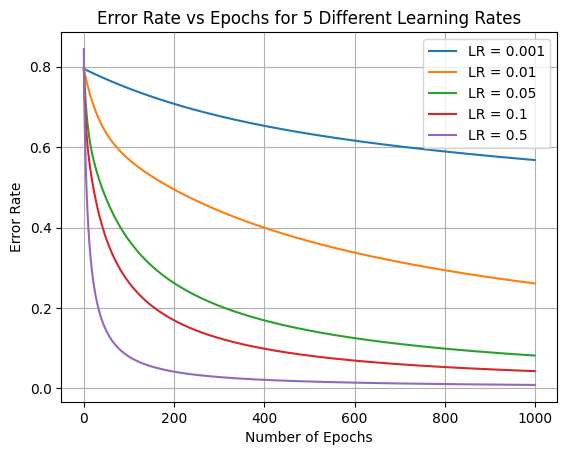

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 0, 0, 1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 5 different learning rates
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
epochs = 1000

all_errors = {}

for lr in learning_rates:
    w = np.array([0.1, 0.2])
    b = 0.3
    errors = []

    for epoch in range(epochs):
        epoch_error = 0

        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = sigmoid(z)

            # Binary Cross-Entropy Loss
            loss = -(y[i] * np.log(y_pred + 1e-9) +
                     (1 - y[i]) * np.log(1 - y_pred + 1e-9))
            epoch_error += loss

            # Gradient update
            dz = y_pred - y[i]
            w -= lr * dz * X[i]
            b -= lr * dz

        errors.append(epoch_error / len(X))

    all_errors[lr] = errors

# Plot Error vs Epochs
for lr, errors in all_errors.items():
    plt.plot(errors, label=f"LR = {lr}")

plt.xlabel("Number of Epochs")
plt.ylabel("Error Rate")
plt.title("Error Rate vs Epochs for 5 Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()


OR Gate Training with Different Error Rates (Learning Rates)

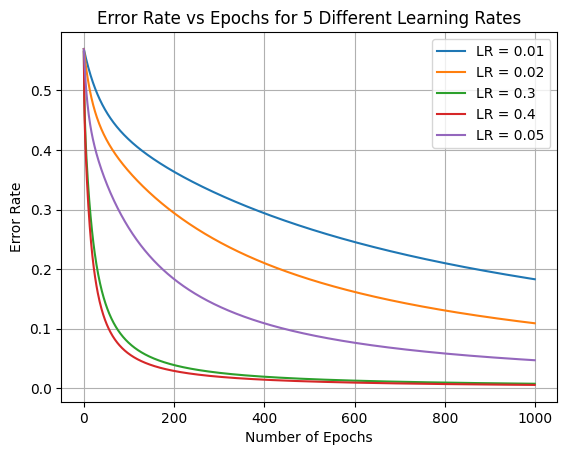

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# OR gate data
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 5 different learning rates
learning_rates = [0.01, 0.02, 0.3, 0.4, 0.05]
epochs = 1000

all_errors = {}

for lr in learning_rates:
    w = np.array([0.1, 0.2])
    b = 0.3
    errors = []

    for epoch in range(epochs):
        epoch_error = 0

        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = sigmoid(z)

            # Binary Cross-Entropy Loss
            loss = -(y[i] * np.log(y_pred + 1e-9) +
                     (1 - y[i]) * np.log(1 - y_pred + 1e-9))
            epoch_error += loss

            # Gradient update
            dz = y_pred - y[i]
            w -= lr * dz * X[i]
            b -= lr * dz

        errors.append(epoch_error / len(X))

    all_errors[lr] = errors

# Plot Error vs Epochs
for lr, errors in all_errors.items():
    plt.plot(errors, label=f"LR = {lr}")

plt.xlabel("Number of Epochs")
plt.ylabel("Error Rate")
plt.title("Error Rate vs Epochs for 5 Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()
